In [1]:
from sympy import symbols, Function, Derivative, diff, simplify, Matrix, solve
from sympy.physics.mechanics import init_vprinting
import sympy as sp

# this is responsible to visualize time derivatives with dots
init_vprinting()

# then you need to define x as a functions of time
t, g, m_1, m_2, l_1, l_2, I_1, I_2 ,tau_a, tau_b, L = symbols('t g m_1 m_2 l_1 l_2 I_1 I_2 tau_a tau_b, L')

# define angulat position of the two rods
# a represents the first pendulum components
# b for the second
theta_1a = Function("theta_1a")(t)
theta_1b = Function("theta_1b")(t)

# define angular position of the two flywheels
theta_2a = Function("theta_2a")(t)
theta_2b = Function("theta_2b")(t)

# Now you can visualize derivatives with dots
theta_1a_dot = Derivative(theta_1a, t)
theta_1b_dot = Derivative(theta_1b, t)

theta_2a_dot = Derivative(theta_2a, t)
theta_2b_dot = Derivative(theta_2b, t)

theta_1a_dot_dot = Derivative(theta_1a_dot, t)
theta_1b_dot_dot = Derivative(theta_1b_dot, t)

theta_2a_dot_dot = Derivative(theta_2a_dot, t)
theta_2b_dot_dot = Derivative(theta_2b_dot, t)

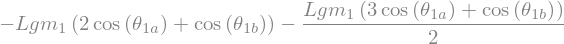

In [2]:
# define potential energies of rods
U_rods = -g*m_1*(L/2)*(3*sp.cos(theta_1a) + sp.cos(theta_1b))

# define potential energies of wheels
U_wheels = -g*m_1*L*(2*sp.cos(theta_1a) + sp.cos(theta_1b))

U = U_rods + U_wheels
display(U)

In [3]:
# define translational kinetic energies

# for Rod a
KE_t_1a = (1/8)*m_1*((theta_1a_dot*L)**2)*(sp.cos(theta_1a) - sp.sin(theta_1a))**2

# for Wheel a
KE_t_2a = (1/2)*m_2*((theta_1a_dot*L)**2)*(sp.cos(theta_1a) - sp.sin(theta_1a))**2

# for Rod b
KE_t_1b = (1/2)*m_1*(L*(theta_1a_dot*(sp.cos(theta_1a) - sp.sin(theta_1a)) 
                       + (theta_1b_dot/2)*(sp.cos(theta_1b) - sp.sin(theta_1b))))**2

# for Rod a
KE_t_2b = (1/2)*(m_2)*(L*(theta_1a_dot*(sp.cos(theta_1a) - sp.sin(theta_1a)) 
                         + theta_1b_dot*(sp.cos(theta_1b) - sp.sin(theta_1b))))**2

KE_trans = KE_t_1a + KE_t_2a + KE_t_1b + KE_t_2b

In [4]:
# define rotational kinetic energies

# rotational kinetic enegy of the 1st rod and flywheel about
# their CoM
KE_rot_a = (1/2)*(I_1*theta_1a_dot**2 + I_2*(theta_1a_dot + theta_2a_dot)**2)

# rotational kinetic enegy of the 2nd rod and flywheel about
# their CoM
KE_rot_b = (1/2)*(I_1*(theta_1a_dot + theta_1b_dot)**2 
                  + I_2*(theta_1a_dot + theta_1b_dot + theta_2b_dot)**2)

KE_rot = KE_rot_a + KE_rot_b


In [5]:
KE = KE_rot + KE_trans
Lagrange = KE - U

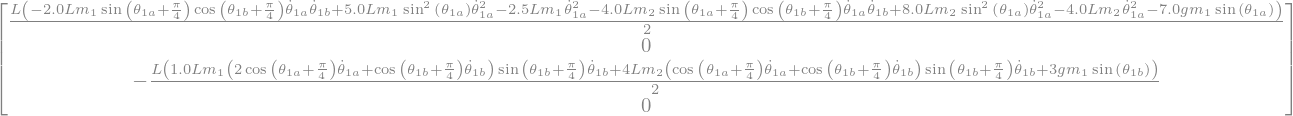

In [6]:
delL_deltheta1a = diff(Lagrange, theta_1a)
delL_deltheta2a = diff(Lagrange, theta_2a)

delL_deltheta1b = diff(Lagrange, theta_1b)
delL_deltheta2b = diff(Lagrange, theta_2b)

dL_dt = Matrix([delL_deltheta1a,
                delL_deltheta2a, 
                delL_deltheta1b, 
                delL_deltheta2b])

display(simplify(dL_dt))

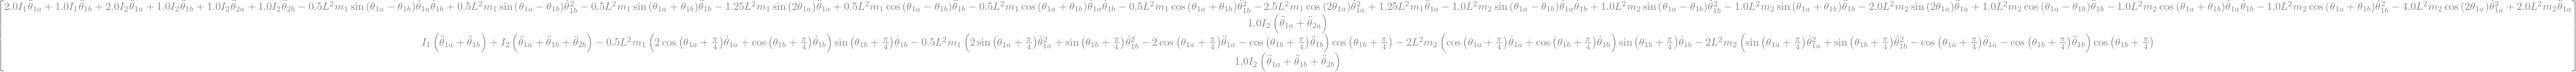

In [7]:
d_dt_delL_deltheta1a_dot = diff(diff(Lagrange, theta_1a_dot), t)
d_dt_delL_deltheta2a_dot = diff(diff(Lagrange, theta_2a_dot), t)

d_dt_delL_deltheta1b_dot = diff(diff(Lagrange, theta_1b_dot), t)
d_dt_delL_deltheta2b_dot = diff(diff(Lagrange, theta_2b_dot), t)

ddL_ddt = Matrix([d_dt_delL_deltheta1a_dot,
                  d_dt_delL_deltheta2a_dot,
                  d_dt_delL_deltheta1b_dot,
                  d_dt_delL_deltheta2b_dot,])

display(simplify(ddL_ddt))

In [8]:

solve([d_dt_delL_deltheta1a_dot - delL_deltheta1a, 
       d_dt_delL_deltheta2a_dot - delL_deltheta2a - tau_a,
       d_dt_delL_deltheta1b_dot - delL_deltheta1b, 
       d_dt_delL_deltheta2b_dot - delL_deltheta2b - tau_b], 
       [theta_1a_dot_dot, theta_2a_dot_dot, theta_1b_dot_dot, theta_2b_dot_dot], dict=True)